In [1]:
import os

path = 'Amazon/Product'
wal = os.listdir(path)

len(wal)

0

In [41]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

Counting

In [2]:
folder = ['Amazon', 'Ebay', 'Facebook', 'Freepik', 'Instagram', 'Lazada', 'Line', 'Pexels', 'Shopee', 'Unsplash', 'Walmart', 'wisepops']
count = 0

for dir in folder:
    path = os.path.join(dir, "Product")
    if os.path.exists(path) and os.path.isdir(path):
        count += len(os.listdir(path))
print(f'Product Amount: {count}')

count_2 = 0
for dir in folder:
    path_2 = os.path.join(dir, "Food")
    if os.path.exists(path_2) and os.path.isdir(path_2):
        count_2 += len(os.listdir(path_2))
print(f'Food Amount: {count_2}')
        
print(f'Total: {count+count_2}')

Product Amount: 0
Food Amount: 0
Total: 0


Rename Files

In [7]:
folder = ['Amazon', 'Ebay', 'Facebook', 'Freepik', 'Instagram', 'Lazada', 'Line', 'Pexels', 'Shopee', 'Unsplash', 'Walmart', 'wisepops']
categories = ['Product', 'Food']

for dir in folder:
    for category in categories:
        path = os.path.join(dir, category)
        if os.path.exists(path) and os.path.isdir(path):
            files = os.listdir(path)
            
            for idx, file in enumerate(files, start=1):
                old_path = os.path.join(path, file)
                new_name = f"{dir}_{category}_{idx}.jpeg"
                new_path = os.path.join(path, new_name)
                
                try:
                    with Image.open(old_path) as img:
                        img.convert("RGB").save(new_path, "JPEG")
                    os.remove(old_path)  # ลบไฟล์เดิมหลังจากแปลง
                except Exception as e:
                    print(f"Error processing {old_path}: {e}")

print("Renaming and conversion completed.")


c:\Users\BM MONEY\miniconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Renaming and conversion completed.


In [70]:
import shutil

Merge Files

In [9]:
output_folder = 'Merged Files'
os.makedirs(output_folder, exist_ok=True)

for folder in folder:
    for category in categories:
        source_path = os.path.join(folder, category)
        if os.path.exists(source_path):  # ตรวจสอบว่าโฟลเดอร์หมวดหมู่นั้นมีอยู่จริง
            for file_name in os.listdir(source_path):
                source_file = os.path.join(source_path, file_name)
                destination_file = os.path.join(output_folder, file_name)
                
                # ตรวจสอบว่ามีไฟล์ชื่อเดียวกันในโฟลเดอร์ปลายทางหรือไม่
                if os.path.exists(destination_file):
                    base, ext = os.path.splitext(file_name)
                    counter = 1
                    new_file_name = f"{base}_{counter}{ext}"
                    destination_file = os.path.join(output_folder, new_file_name)
                    while os.path.exists(destination_file):
                        counter += 1
                        new_file_name = f"{base}_{counter}{ext}"
                        destination_file = os.path.join(output_folder, new_file_name)
                
                shutil.move(source_file, destination_file)  # ย้ายไฟล์

Metadata

In [32]:
import pandas as pd
import hashlib

In [30]:
base_folder = "Merged Files"

In [61]:
metadata_list = []

# วนลูปอ่านไฟล์ในโฟลเดอร์
for file_name in os.listdir(base_folder):
    file_path = os.path.join(base_folder, file_name)
    if not os.path.isfile(file_path):
        continue
    
    # Computing Hash ID
    file_hash = hashlib.md5(file_name.encode()).hexdigest()
    
    # Extract Source
    source = file_name.split("_")[0]
    
    # Extract Type
    type = file_name.split("_")[1]
    
    # Extract File type
    file_type = os.path.splitext(file_name)[1].lower()
    
    # Extract File (KB)
    file_size_kb = round(os.path.getsize(file_path) / 1024, 2)
    
    # Extract Resolution
    try:
        with Image.open(file_path) as img:
            resolution = f"{img.width}x{img.height}"
    except:
        resolution = "N/A"
    
    # เพิ่มข้อมูลลงในรายการ
    metadata_list.append([file_hash, source, file_name, type, file_type, file_size_kb, resolution])

In [62]:
df_metadata = pd.DataFrame(metadata_list, columns=["id", "source", "File_name", "Type", "File_Type", "File_size_kb", "resolution"])
df_metadata

,id,source,File_name,Type,File_Type,File_size_kb,resolution
0,c7e254ff6e829bbd379c791c06dba26a,Amazon,Amazon_Product_1.jpeg,Product,.jpeg,64.01,556x552
1,310f05853aa67594eadcecfaeab260c9,Amazon,Amazon_Product_10.jpeg,Product,.jpeg,155.39,1170x1169
2,a602b8402e30353896de582cfc8602d6,Amazon,Amazon_Product_11.jpeg,Product,.jpeg,75.09,1170x1018
3,4eea40723af32721712529331dc268e8,Amazon,Amazon_Product_12.jpeg,Product,.jpeg,77.93,1000x1000
4,c863dc028d2446a5a578c77a2efa5806,Amazon,Amazon_Product_13.jpeg,Product,.jpeg,61.27,554x554
...,...,...,...,...,...,...,...
1151,e5a836a0356dc3b5949c00eb9ddb2c08,wisepops,wisepops_Product_5.jpeg,Product,.jpeg,30.69,400x622
1152,62d04bf55fa25c0b1e4976346030997c,wisepops,wisepops_Product_6.jpeg,Product,.jpeg,89.00,1706x1234
1153,f000a0f5e71a56d81262fe8bab8b2b5a,wisepops,wisepops_Product_7.jpeg,Product,.jpeg,86.45,768x1199
1154,ca7337f25230b8c60291929edd36682e,wisepops,wisepops_Product_8.jpeg,Product,.jpeg,361.24,1240x1754


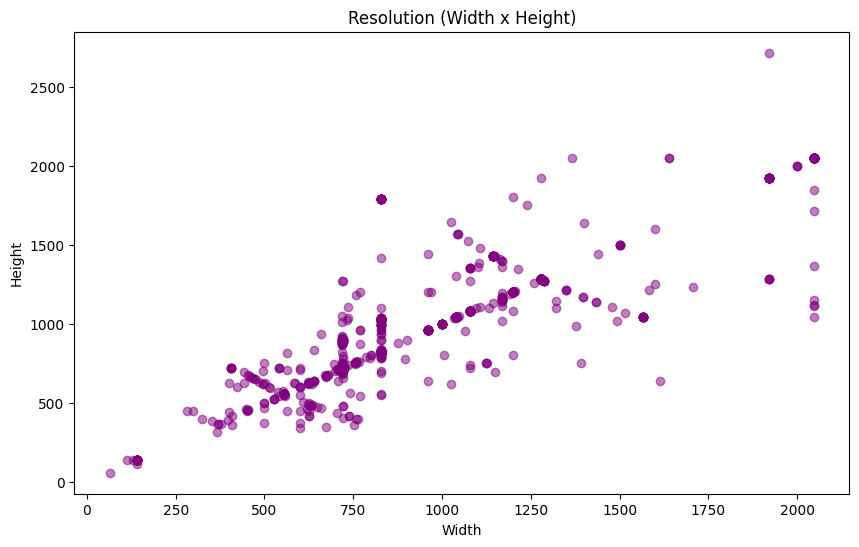

In [63]:
df_metadata[['Width', 'Height']] = df_metadata['resolution'].apply(lambda x: pd.Series(str(x).split('x')))
df_metadata['Width'] = df_metadata['Width'].astype(int)
df_metadata['Height'] = df_metadata['Height'].astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(df_metadata['Width'], df_metadata['Height'], color='purple', alpha=0.5)
plt.title('Resolution (Width x Height)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [64]:
df_metadata

,id,source,File_name,Type,File_Type,File_size_kb,resolution,Width,Height
0,c7e254ff6e829bbd379c791c06dba26a,Amazon,Amazon_Product_1.jpeg,Product,.jpeg,64.01,556x552,556,552
1,310f05853aa67594eadcecfaeab260c9,Amazon,Amazon_Product_10.jpeg,Product,.jpeg,155.39,1170x1169,1170,1169
2,a602b8402e30353896de582cfc8602d6,Amazon,Amazon_Product_11.jpeg,Product,.jpeg,75.09,1170x1018,1170,1018
3,4eea40723af32721712529331dc268e8,Amazon,Amazon_Product_12.jpeg,Product,.jpeg,77.93,1000x1000,1000,1000
4,c863dc028d2446a5a578c77a2efa5806,Amazon,Amazon_Product_13.jpeg,Product,.jpeg,61.27,554x554,554,554
...,...,...,...,...,...,...,...,...,...
1151,e5a836a0356dc3b5949c00eb9ddb2c08,wisepops,wisepops_Product_5.jpeg,Product,.jpeg,30.69,400x622,400,622
1152,62d04bf55fa25c0b1e4976346030997c,wisepops,wisepops_Product_6.jpeg,Product,.jpeg,89.00,1706x1234,1706,1234
1153,f000a0f5e71a56d81262fe8bab8b2b5a,wisepops,wisepops_Product_7.jpeg,Product,.jpeg,86.45,768x1199,768,1199
1154,ca7337f25230b8c60291929edd36682e,wisepops,wisepops_Product_8.jpeg,Product,.jpeg,361.24,1240x1754,1240,1754


In [65]:
df_metadata.to_csv("Advertisement.csv", index=False)

Duplicate Clearing

In [ ]:
import imagehash
from PIL import Image
import os
from collections import defaultdict

def find_duplicate_images(image_folder):
    """
    ค้นหาและจัดกลุ่มภาพที่ซ้ำกันในโฟลเดอร์
    
    Parameters:
        image_folder (str): พาธไปยังโฟลเดอร์ที่มีภาพ
    
    Returns:
        dict: คู่ของ {hash_value: [list_of_duplicate_files]}
    """
    hash_groups = defaultdict(list)
    
    for filename in os.listdir(image_folder):
        filepath = os.path.join(image_folder, filename)
        try:
            with Image.open(filepath) as img:
                # คำนวณค่าแฮชของภาพ (ใช้ phash ที่ทนต่อการปรับขนาด/คุณภาพ)
                img_hash = imagehash.phash(img)
                
                # เพิ่มไฟล์ลงในกลุ่มตามค่าแฮช
                hash_groups[str(img_hash)].append(filename)
        except Exception as e:
            print(f"เกิดข้อผิดพลาดเมื่อประมวลผลไฟล์ {filename}: {e}")
    
    # กรองเฉพาะกลุ่มที่มีภาพซ้ำ
    duplicates = {h: files for h, files in hash_groups.items() if len(files) > 1}
    
    return duplicates

def print_duplicate_groups(duplicates):
    """
    พิมพ์รายการภาพที่ซ้ำกันเป็นกลุ่มๆ
    
    Parameters:
        duplicates (dict): ผลลัพธ์จากฟังก์ชัน find_duplicate_images
    """
    if not duplicates:
        print("ไม่พบภาพที่ซ้ำกัน")
        return
    
    print(f"พบ {len(duplicates)} กลุ่มภาพที่ซ้ำกัน:\n")
    for group_idx, (hash_val, files) in enumerate(duplicates.items(), 1):
        print(f"กลุ่มที่ {group_idx} (ค่าแฮช: {hash_val}):")
        for file_idx, filename in enumerate(files, 1):
            print(f"  {file_idx}. {filename}")
        print()  

In [ ]:
if __name__ == "__main__":
    image_folder = "Merged Files"  
    duplicates = find_duplicate_images(image_folder)
    print_duplicate_groups(duplicates)
    
    # สรุปผล
    total_duplicates = sum(len(files)-1 for files in duplicates.values())
    print(f"\nสรุป: พบไฟล์ที่ซ้ำกันทั้งหมด {total_duplicates} ไฟล์ ใน {len(duplicates)} กลุ่ม")

พบ 40 กลุ่มภาพที่ซ้ำกัน:

กลุ่มที่ 1 (ค่าแฮช: e5ba1b8517857ae0):
  1. Facebook_Food_107.jpeg
  2. Facebook_Food_112.jpeg

กลุ่มที่ 2 (ค่าแฮช: eb259533614e5b68):
  1. Facebook_Food_13.jpeg
  2. Facebook_Product_12.jpeg

กลุ่มที่ 3 (ค่าแฮช: d5ca0a2be5c3c3e4):
  1. Facebook_Food_16.jpeg
  2. Facebook_Food_76.jpeg

กลุ่มที่ 4 (ค่าแฮช: c789b94c071f1bf0):
  1. Facebook_Food_32.jpeg
  2. Facebook_Product_96.jpeg

กลุ่มที่ 5 (ค่าแฮช: 94be978a6ad04b0f):
  1. Facebook_Food_40.jpeg
  2. Facebook_Product_115.jpeg

กลุ่มที่ 6 (ค่าแฮช: ed9a916b9689d462):
  1. Facebook_Food_45.jpeg
  2. Facebook_Product_126.jpeg

กลุ่มที่ 7 (ค่าแฮช: ae8335f474ee860a):
  1. Facebook_Food_52.jpeg
  2. Facebook_Food_56.jpeg

กลุ่มที่ 8 (ค่าแฮช: e7cce133633d9890):
  1. Facebook_Food_83.jpeg
  2. Facebook_Product_294.jpeg

กลุ่มที่ 9 (ค่าแฮช: f0f505c898d3cb2e):
  1. Facebook_Food_87.jpeg
  2. Facebook_Product_531.jpeg

กลุ่มที่ 10 (ค่าแฮช: 9eaf868578ca6878):
  1. Facebook_Product_137.jpeg
  2. Instagram_Product_132.jpeg



In [6]:
duplicates

{'e5ba1b8517857ae0': ['Facebook_Food_107.jpeg', 'Facebook_Food_112.jpeg'],
 'eb259533614e5b68': ['Facebook_Food_13.jpeg', 'Facebook_Product_12.jpeg'],
 'd5ca0a2be5c3c3e4': ['Facebook_Food_16.jpeg', 'Facebook_Food_76.jpeg'],
 'c789b94c071f1bf0': ['Facebook_Food_32.jpeg', 'Facebook_Product_96.jpeg'],
 '94be978a6ad04b0f': ['Facebook_Food_40.jpeg', 'Facebook_Product_115.jpeg'],
 'ed9a916b9689d462': ['Facebook_Food_45.jpeg', 'Facebook_Product_126.jpeg'],
 'ae8335f474ee860a': ['Facebook_Food_52.jpeg', 'Facebook_Food_56.jpeg'],
 'e7cce133633d9890': ['Facebook_Food_83.jpeg', 'Facebook_Product_294.jpeg'],
 'f0f505c898d3cb2e': ['Facebook_Food_87.jpeg', 'Facebook_Product_531.jpeg'],
 '9eaf868578ca6878': ['Facebook_Product_137.jpeg',
  'Instagram_Product_132.jpeg'],
 '9fea3039eac6cc90': ['Facebook_Product_138.jpeg',
  'Instagram_Product_128.jpeg'],
 'ae0c949439b97aea': ['Facebook_Product_201.jpeg', 'Instagram_Product_6.jpeg'],
 '81ee2bb371c19c3c': ['Facebook_Product_202.jpeg', 'Instagram_Product_7

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
import random
sampled_hashes = dict(random.sample(list(duplicates.items()), 20))
test_samples = dict(random.sample(list(duplicates.items()), 2))

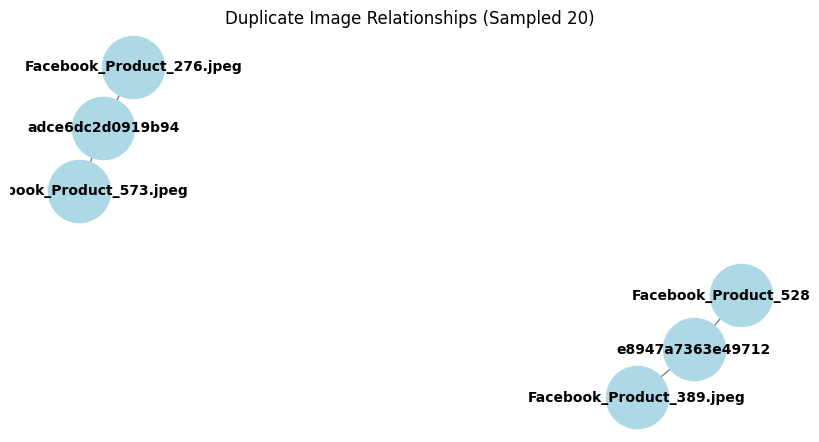

In [45]:
G = nx.Graph()
for hash_value, files in test_samples.items():
    for file in files:
        G.add_edge(hash_value, file)
        
plt.figure(figsize=(8, 4))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
plt.title("Duplicate Image Relationships (Sampled 20)")
plt.show()

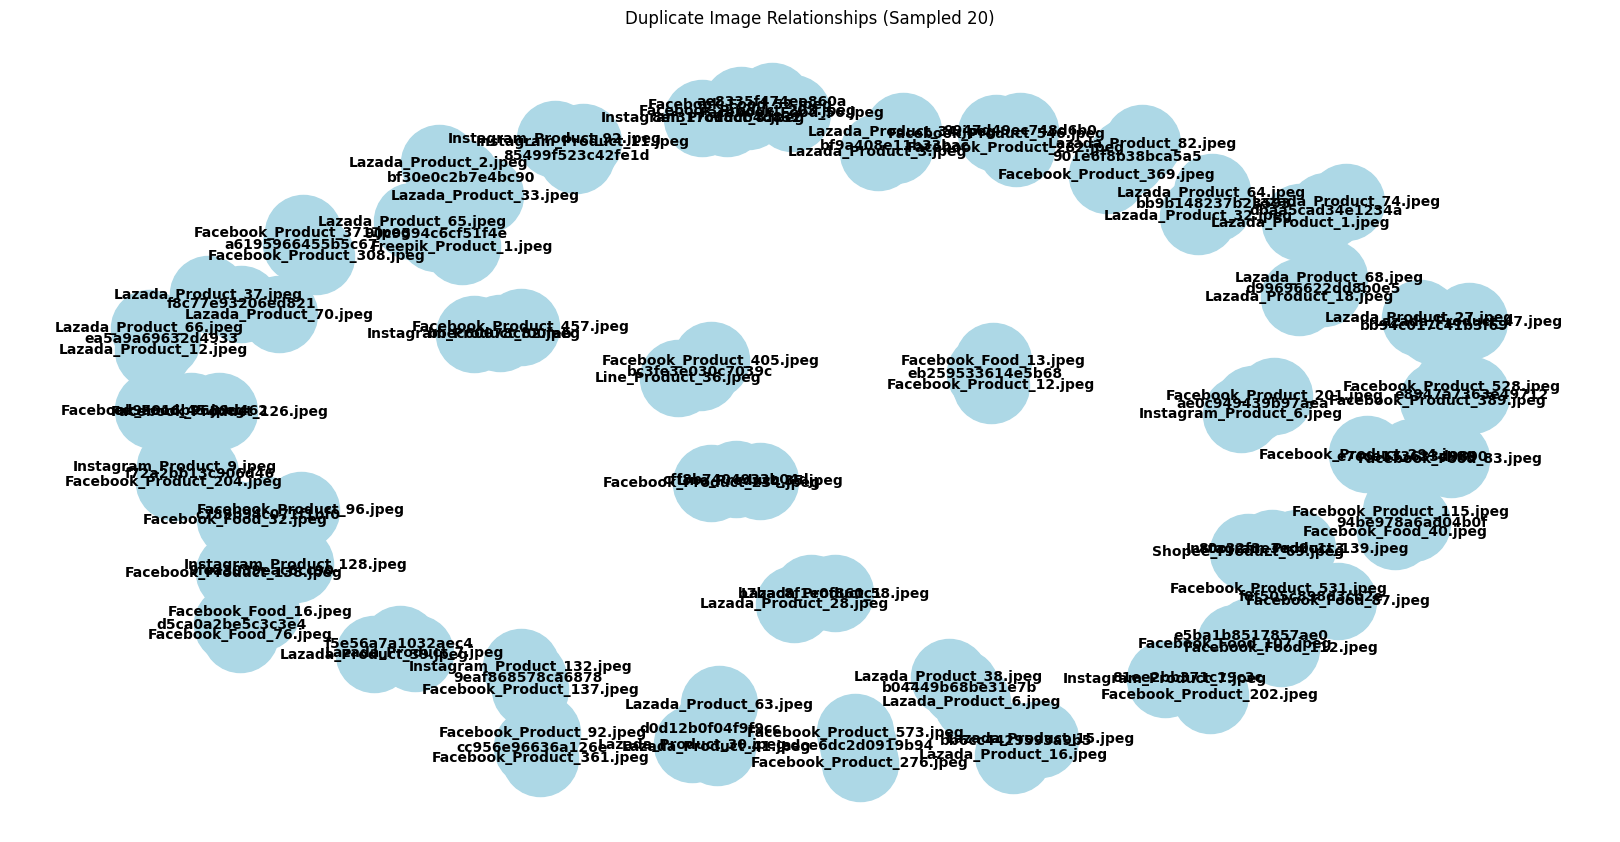

In [10]:
# สร้างกราฟแสดงความสัมพันธ์ของไฟล์ที่ซ้ำกัน
G = nx.Graph()
for hash_value, files in duplicates.items():
    for file in files:
        G.add_edge(hash_value, file)

# วาดกราฟ
plt.figure(figsize=(16, 8))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
plt.title("Duplicate Image Relationships (Sampled 20)")
plt.show()

In [ ]:
sampled_hashes = random.sample(list(duplicates.items()), 8)

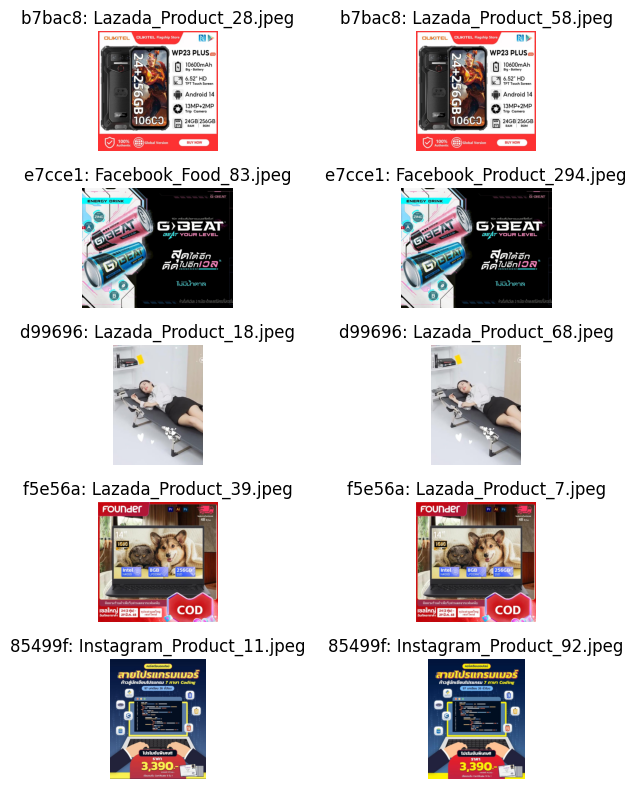

In [ ]:
base_folder = "Merged Files"
fig, axes = plt.subplots(len(sampled_hashes), 2, figsize=(8, 8))

for i, (hash_id, file_list) in enumerate(sampled_hashes):
    for j in range(2):
        img_path = os.path.join(base_folder, file_list[j])  

        # ตรวจสอบว่าไฟล์มีอยู่จริงหรือไม่
        if not os.path.exists(img_path):
            print(f"ไฟล์ไม่พบ: {img_path}")
            continue

        img = Image.open(img_path)  
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(f"{hash_id[:6]}: {file_list[j]}")

plt.tight_layout()
plt.show()


In [48]:
len(os.listdir(base_folder))

1156

Folder Clearing

In [ ]:
source_folder = "Source Folder"
os.makedirs(source_folder, exist_ok=True)

for folder in folder:
    if os.path.exists(folder):  
        shutil.move(folder, os.path.join(source_folder, folder))
        print(f"Moved {folder} to {source_folder}/")
    else:
        print(f"Folder {folder} not found!")

Moved Amazon to Source Folder/
Moved Ebay to Source Folder/
Moved Facebook to Source Folder/
Moved Freepik to Source Folder/
Moved Instagram to Source Folder/
Moved Lazada to Source Folder/
Moved Line to Source Folder/
Moved Pexels to Source Folder/
Moved Shopee to Source Folder/
Moved Unsplash to Source Folder/
Moved Walmart to Source Folder/
Moved wisepops to Source Folder/
✅ All folders moved successfully!


Duplicate Deleting

In [ ]:
destination_folder = "Backup_Files"  
os.makedirs(destination_folder, exist_ok=True)

In [73]:
for file_name in os.listdir(base_folder):
    file_path = os.path.join(base_folder, file_name)
    
    if os.path.isfile(file_path):
        shutil.copy2(file_path, os.path.join(destination_folder, file_name))
        
print(f'Files copied to {destination_folder} successfully')

Files copied to Backup_Files successfully


In [95]:
if __name__ == "__main__":
    image_1 = "Backup_Files"
    dup_1 = find_duplicate_images(image_1)
    print_duplicate_groups(dup_1)
    
    total_1 = sum(len(files)-1 for files in dup_1.values())
    print(f'Total: {total_1} in {len(dup_1)}')

ไม่พบภาพที่ซ้ำกัน
Total: 0 in 0


In [98]:
len(os.listdir("Backup_Files")), len(os.listdir("Merged Files")), len(os.listdir("Duplicate File"))

(1115, 1115, 41)